In [1]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

K.tensorflow_backend._get_available_gpus()

base_dir = r'C:\Users\Vítor\Documents\TCC\Banco de Dados\BD_Sem_Pretos\Sagital\BD'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

Using TensorFlow backend.


In [2]:
from keras import layers
from keras import models
#Criando a CNN
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 256)       147712    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 256)       590080    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 256)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 256)       590080    
__________

In [4]:
from keras import optimizers

# SGD (Descida do Gradiente Estocástico) - Otimizador 
momentum = 0.5
sgd = optimizers.SGD(lr=0.01, momentum=momentum, decay=0.0, nesterov=False) 

model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['acc'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
from keras.preprocessing.image import ImageDataGenerator

# Todas as imagens em nova scale
train_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.2,  
                                   height_shift_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.2,  
                                   height_shift_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        
        train_dir,
        # Todas as images para novo tamanho de 150x150
        target_size=(150, 150),
        batch_size=20,
        # Como foi usado a perda binary_crossentropy, precisamos de rótulos binários
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 8349 images belonging to 2 classes.
Found 3146 images belonging to 2 classes.


In [6]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [8]:
import math
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
def step_decay(epoch):
    
    
    initial_lrate=0.1
    drop=0.6
    epochs_drop = 3.0
    lrate= initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
    return lrate
   

lrate = LearningRateScheduler(step_decay)
callbacks_list = [ lrate]

In [9]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 77s 767ms/step - loss: 0.6888 - acc: 0.5510 - val_loss: 0.6643 - val_acc: 0.6630
Epoch 2/30
100/100 [==============================] - 64s 635ms/step - loss: 0.6871 - acc: 0.5525 - val_loss: 0.6727 - val_acc: 0.6370
Epoch 3/30
100/100 [==============================] - 62s 624ms/step - loss: 0.6864 - acc: 0.5510 - val_loss: 0.6528 - val_acc: 0.6630
Epoch 4/30
100/100 [==============================] - 52s 517ms/step - loss: 0.6877 - acc: 0.5455 - val_loss: 0.6588 - val_acc: 0.6856
Epoch 5/30
100/100 [==============================] - 46s 463ms/step - loss: 0.6879 - acc: 0.5429 - val_loss: 0.6668 - val_acc: 0.6470
Epoch 6/30
100/100 [==============================] - 45s 448ms/step - loss: 0.6823 - acc: 0.5710 - val_loss: 0.6657 - val_acc: 0.6320
Epoch 7/30
100/100 [==============================] - 45s 446ms/step - loss: 0.6845 - acc: 0.5585 - val_loss: 0.6678 - val_acc: 0.6339
Epoch 8/30
100/100 [==============================] - 4

A acurácia da validação é de: 0.6049999988079071
A perda da validação é de: 0.641445050239563


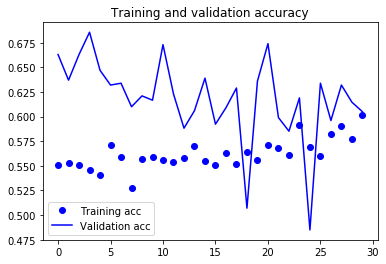

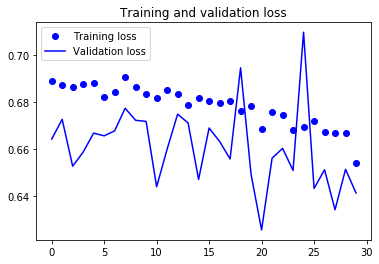

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
print('A acurácia da validação é de:', val_acc[29])
print('A perda da validação é de:', val_loss[29])
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
from sklearn.metrics import confusion_matrix
Y_prediction = model.predict_generator(validation_generator,len(validation_generator))
Y_pred_classes = np.argmax(Y_prediction,axis = 1) 
confusion_mtx = confusion_matrix(validation_generator.classes, Y_pred_classes)

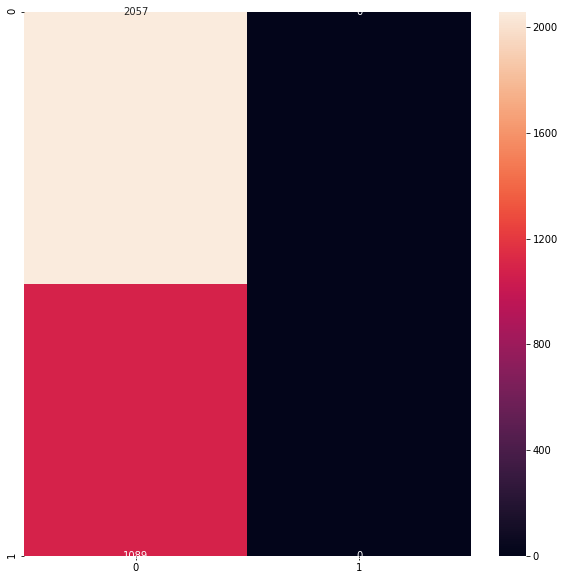

In [13]:
plt.figure(figsize=(10,10))
import seaborn as sns
sns.heatmap(confusion_mtx, annot=True, fmt="d");